In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>.container {width:90% !important;}</style>"))

In [2]:
%matplotlib notebook

from numpy import *
import os
from os import path
home = path.expanduser("~")

import matplotlib.pyplot as plt

# define plot style
width = 0.05
plotMarkerSize = 8
labelfontsize = 15
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [6., 4.5]
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['xtick.top'] = True
mpl.rcParams['xtick.labelsize'] = 15
mpl.rcParams['xtick.major.width'] = 1.0
mpl.rcParams['xtick.minor.width'] = 0.8
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = "in"
mpl.rcParams['ytick.right'] = True
mpl.rcParams['ytick.labelsize'] = 15
mpl.rcParams['ytick.major.width'] = 1.0
mpl.rcParams['ytick.minor.width'] = 0.8
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['ytick.direction'] = "in"
mpl.rcParams['legend.fontsize'] = 15
mpl.rcParams['legend.numpoints'] = 1
mpl.rcParams['font.size'] = 15
mpl.rcParams['savefig.format'] = "pdf"

EPS = 1e-16  # a small number

# read in results

In [3]:
working_path = os.getcwd()
results_path = os.path.dirname(working_path)
plots_path = path.join(os.path.dirname(working_path), "plots")
exercise_path = "run_exercise_1"

In [4]:
nev = 0
event_list = []
with open(path.join(results_path, exercise_path, "hadron_list.dat")) as fp:
    line = fp.readline()  # read in the header
    while line:
        nparticles = int(line.split()[3])
        event_i = []
        for ipart in range(nparticles):
            line = fp.readline()
            event_i.append(array([float(i) for i in line.split()]))
        event_list.append(array(event_i))
        nev += 1
        # print("Event {} has {} particles".format(nev, nparticles))
        line = fp.readline()  # read in the header
print("Read in total {} events.".format(nev))

Read in total 20 events.


# calculate observables

In [5]:
class SimpleHistogram:
    """A simple histogram class"""
    def __init__(self, x_min, x_max, nx):
        self.x_min_ = x_min
        self.x_max_ = x_max
        self.nx_ = nx
        self.dx_ = (x_max - x_min)/nx
        self.bin_x_ = zeros(nx)
        for i in range(nx):
            self.bin_x_[i] = x_min + (i+0.5)*self.dx_
        self.bin_y_ = zeros(nx)
    
    def fill(self, x_in, val):
        idx = int((x_in - self.x_min_)/self.dx_)
        if idx >= 0 and idx < self.nx_:
            self.bin_y_[idx] += val

In [6]:
y_cut = 0.5

def calc_obs(pid):
    
    pTSpectra   = SimpleHistogram(0.0, 3.0, 31)
    
    multi = 0
    
    for event_i in event_list:
        npart, ncol = event_i.shape
        for ipart in range(npart):
            if event_i[ipart][1] != pid: continue
            if event_i[ipart][3] > abs(event_i[ipart][6]):
                # compute the particle rapidity
                y = 0.5*log((event_i[ipart][3] + event_i[ipart][6])
                            /(event_i[ipart][3] - event_i[ipart][6] + EPS))
                # compute particle pT
                pT = sqrt(event_i[ipart][4]**2 + event_i[ipart][5]**2.)
                if y < y_cut and y > -y_cut:  # select the rapidity acceptance
                    pTSpectra.fill(pT, 1.)
                    multi +=1
                        
    # dN/2pi*pTdpTdy
    delta_y = 2.*y_cut
    delta_pT = pTSpectra.bin_x_[1] - pTSpectra.bin_x_[0]
    pTSpectra_err = sqrt(pTSpectra.bin_y_/nev)/(delta_y*delta_pT*2*math.pi);
    pTSpectra.bin_y_ /= (nev*delta_y*delta_pT*2*math.pi)   # divide spectra by dy and dpT
    
    # dN/dy
    dNdy = multi/(nev*delta_y)
    dNdy_err = sqrt(multi/nev)/delta_y;
    
    # mean pT
    mean_pT = sum(pTSpectra.bin_x_*pTSpectra.bin_y_)/sum(pTSpectra.bin_y_)

    return pTSpectra, pTSpectra_err, dNdy, dNdy_err, mean_pT

In [7]:
pid_list = [211, 321, 2212]

identified_obs = {}

for pid in pid_list:
    
    identified_obs['{:d}'.format(pid)] = calc_obs(pid)
    
pi_obs = identified_obs['211']
k_obs = identified_obs['321']
p_obs = identified_obs['2212']

# results for Au-Au @200 GeV 

In [8]:
syst_name = "0-5% Au-Au@200 GeV"

In [9]:
#https://www.hepdata.net/record/ins624474 #PHENIX
data_200_dNdpT_pi = loadtxt(path.join(results_path, "data/HEPData-ins624474-v1-Figure_6_Pi+.csv"))
dNdpT_pi_pT = data_200_dNdpT_pi[0:28,0]
dNdpT_pi_pT_error = data_200_dNdpT_pi[0:28,2]-data_200_dNdpT_pi[0:28,1]
dNdpT_pi = data_200_dNdpT_pi[0:28,3]
dNdpT_pi_error = data_200_dNdpT_pi[0:28,4]

In [10]:
data_200_dNdpT_k = loadtxt(path.join(results_path, "data", "HEPData-ins624474-v1-Figure_7_K+.csv"))
dNdpT_k_pT = data_200_dNdpT_k[0:16,0]
dNdpT_k_pT_error = data_200_dNdpT_k[0:16,2]-data_200_dNdpT_k[0:16,1]
dNdpT_k = data_200_dNdpT_k[0:16,3]
dNdpT_k_error = data_200_dNdpT_k[0:16,4]

In [11]:
data_200_dNdpT_p = loadtxt(path.join(results_path, "data", "HEPData-ins624474-v1-Figure_8_Protons.csv"))
dNdpT_p_pT = data_200_dNdpT_p[0:22,0]
dNdpT_p_pT_error = data_200_dNdpT_p[0:22,2]-data_200_dNdpT_p[0:22,1]
dNdpT_p = data_200_dNdpT_p[0:22,3]
dNdpT_p_error = data_200_dNdpT_p[0:22,4]

<IPython.core.display.Javascript object>


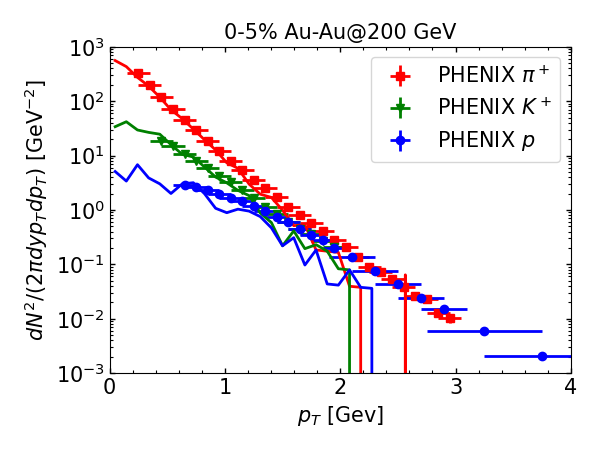

In [12]:
fig = plt.figure()

plt.plot(pi_obs[0].bin_x_, pi_obs[0].bin_y_/pi_obs[0].bin_x_, '-r')
plt.plot(k_obs[0].bin_x_, k_obs[0].bin_y_/k_obs[0].bin_x_, '-g')
plt.plot(p_obs[0].bin_x_, p_obs[0].bin_y_/p_obs[0].bin_x_, '-b')

plt.errorbar(dNdpT_pi_pT, dNdpT_pi, xerr = dNdpT_pi_pT_error, yerr = dNdpT_pi_error, color='r', fmt='s', label=r'PHENIX $\pi^+$')
plt.errorbar(dNdpT_k_pT, dNdpT_k, xerr = dNdpT_k_pT_error, yerr = dNdpT_k_error, color='g', fmt='v', label=r'PHENIX $K^+$')
plt.errorbar(dNdpT_p_pT, dNdpT_p, xerr = dNdpT_p_pT_error, yerr = dNdpT_p_error, color='b', fmt='o', label=r'PHENIX $p$')

plt.legend(loc=0)
plt.xlabel(r"$p_T$ [Gev]")
plt.ylabel(r"$dN^2/(2\pi{}dy p_T dp_T)$ [GeV$^{-2}$]")
plt.xlim([0, 4.])
plt.ylim([1.e-3, 1.e3])
plt.yscale("log")
plt.title(r"{}".format(syst_name), fontsize=labelfontsize)
plt.tight_layout()

plt.savefig(path.join(plots_path, "{0}_plot_pT_spectra").format(exercise_path), bbox_inches='tight')

In [13]:
#http://arxiv.org/pdf/0808.2041v2.pdf; 0-5% #PHENIX
# pion ent_low cent_high cent_mid val err
data_200_dNdy = [286.4, 24.2, 48.9, 6.3, 18.4, 2.6] 

<IPython.core.display.Javascript object>


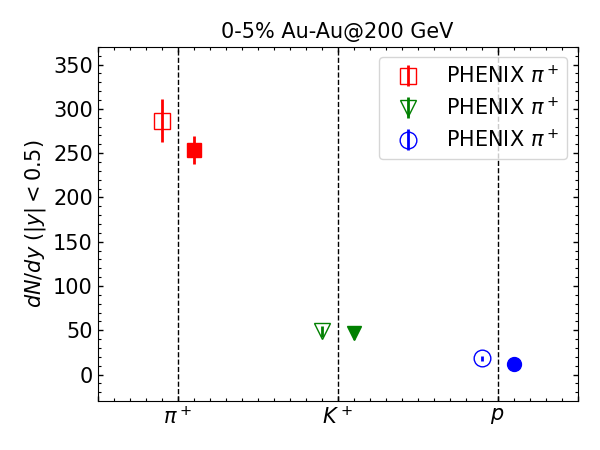

In [14]:
fig = plt.figure()

plt.errorbar(-0.1, data_200_dNdy[0], yerr = data_200_dNdy[1], color='r', fmt='s', markersize=12, markerfacecolor='none', label=r'PHENIX $\pi^+$')
plt.errorbar(0.9, data_200_dNdy[2], yerr = data_200_dNdy[3], color='g', fmt='v', markersize=12, markerfacecolor='none', label=r'PHENIX $\pi^+$')
plt.errorbar(1.9, data_200_dNdy[4], yerr = data_200_dNdy[5], color='b', fmt='o', markersize=12, markerfacecolor='none', label=r'PHENIX $\pi^+$')

plt.axvline(x=0.0, color='k', linestyle='--', linewidth=1)
plt.axvline(x=1.0, color='k', linestyle='--', linewidth=1)
plt.axvline(x=2.0, color='k', linestyle='--', linewidth=1)

plt.errorbar(0.1, pi_obs[2], yerr = pi_obs[3], fmt='s', color='r', markersize=10)
plt.errorbar(1.1, k_obs[2], yerr = k_obs[3], fmt='v', color='g', markersize=10)
plt.errorbar(2.1, p_obs[2], yerr = p_obs[3], fmt='o', color='b', markersize=10)

plt.legend(loc=0, ncol=1)
axes=plt.gca()
axes.set_xticks([-0.5,0,1,2,2.5])
axes.set_xticklabels(["", r"$\pi^+$", r"$K^+$", r"$p$", ""])
plt.ylabel(r"$dN/dy\; (|y|<0.5)$")
plt.ylim([-30, 370])
plt.title(r"{}".format(syst_name), fontsize=labelfontsize)
plt.tight_layout()

plt.savefig(path.join(plots_path, "{0}_plot_multiplicity").format(exercise_path), bbox_inches='tight')

In [15]:
#mean pT 0-5% π+ K+ p #PHENIX
data_200_meanPT = [0.451, 0.033, 0.670, 0.078, 0.949, 0.085] 

<IPython.core.display.Javascript object>


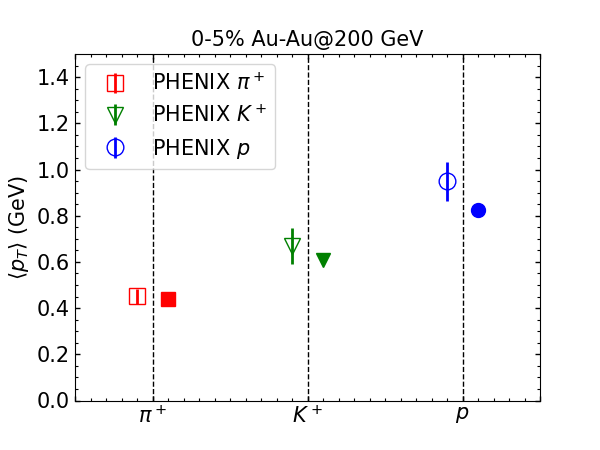

In [16]:
fig = plt.figure()

plt.errorbar(-0.1, data_200_meanPT[0], yerr = data_200_meanPT[1], color='r', fmt='s', markersize=12, markerfacecolor='none', label=r'PHENIX $\pi^+$')
plt.errorbar(0.9, data_200_meanPT[2], yerr = data_200_meanPT[3], color='g', fmt='v', markersize=12, markerfacecolor='none', label=r'PHENIX $K^+$')
plt.errorbar(1.9, data_200_meanPT[4], yerr = data_200_meanPT[5], color='b', fmt='o', markersize=12, markerfacecolor='none', label=r'PHENIX $p$')

plt.axvline(x=0.0, color='k', linestyle='--', linewidth=1)
plt.axvline(x=1.0, color='k', linestyle='--', linewidth=1)
plt.axvline(x=2.0, color='k', linestyle='--', linewidth=1)

plt.plot(0.1, pi_obs[4], 's', color='r', markersize=10)
plt.plot(1.1, k_obs[4], 'v', color='g', markersize=10)
plt.plot(2.1, p_obs[4], 'o', color='b', markersize=10)

plt.legend(loc='upper left', ncol=1)
axes=plt.gca()
axes.set_xticks([-0.5,0,1,2,2.5])
axes.set_xticklabels(["", r"$\pi^+$", r"$K^+$", r"$p$", ""])
plt.ylabel(r"$\langle p_T \rangle$ (GeV)")
plt.ylim([0.0, 1.5])
plt.title(r"{}".format(syst_name), fontsize=labelfontsize)

plt.savefig(path.join(plots_path, "{0}_plot_mean_pT").format(exercise_path), bbox_inches='tight')